# Arbres décisionnels

Apprentissage supervisé - Regression, DecisionTreeRegressor

## Préparation des données

### Téléchargement de données
Téléchargez le jeu de données housing.csv.
Placez le dans le même répertoire de votre fichier (Python ou Notebook).


### Information sur les données
1. Créez un code qui lit le fichier "housing.csv"
et affiche ses premières lignes.
Pour ce faire, utilisez les fonctions "read_csv" et "head" de la bibliothèque pandas.


In [116]:
import pandas as pd

df = pd.read_csv("housing.csv")

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Sachant que la valeur cible est "median_house_value", traitons-nous un problème de classification ou de régression ?

In [117]:
df.median_house_value.dtype
# -> Régression

dtype('float64')

2. Créez un code qui affiche le nombre de lignes et de colonnes des données, le type des attributs et le nombre de valeurs non nulles.


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Quelle remarque sur l’attribut "total_bedrooms" par rapport aux autres attributs ?


    C'est une colonne qui contient moins de valeurs que les autres.

In [119]:
df.total_bedrooms.isnull().sum()

207


3. A travers la question précédente, vous avez du remarquez que le type dans valeurs utilisées dans l’attribut "ocean_proximity" est un objet (forcément un texte vu qu’on manipule un fichier CSV).
Il est intéressant de connaître ses valeurs.
Pour cette finalité, créez un code qui affiche l’occurrence des valeurs utilisées dans cet attribut.

In [120]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


4. Créez un code qui affiche des statistiques sur les attributs de ton jeu de données.

In [121]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



5. Créez un code qui affiche les histogrammes des différents attributs.
Le nombre de "bins" à saisir est 50 et la taille de chaque histogramme "figsize=(20,15)".

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8431CD580>,
      dtype=object)

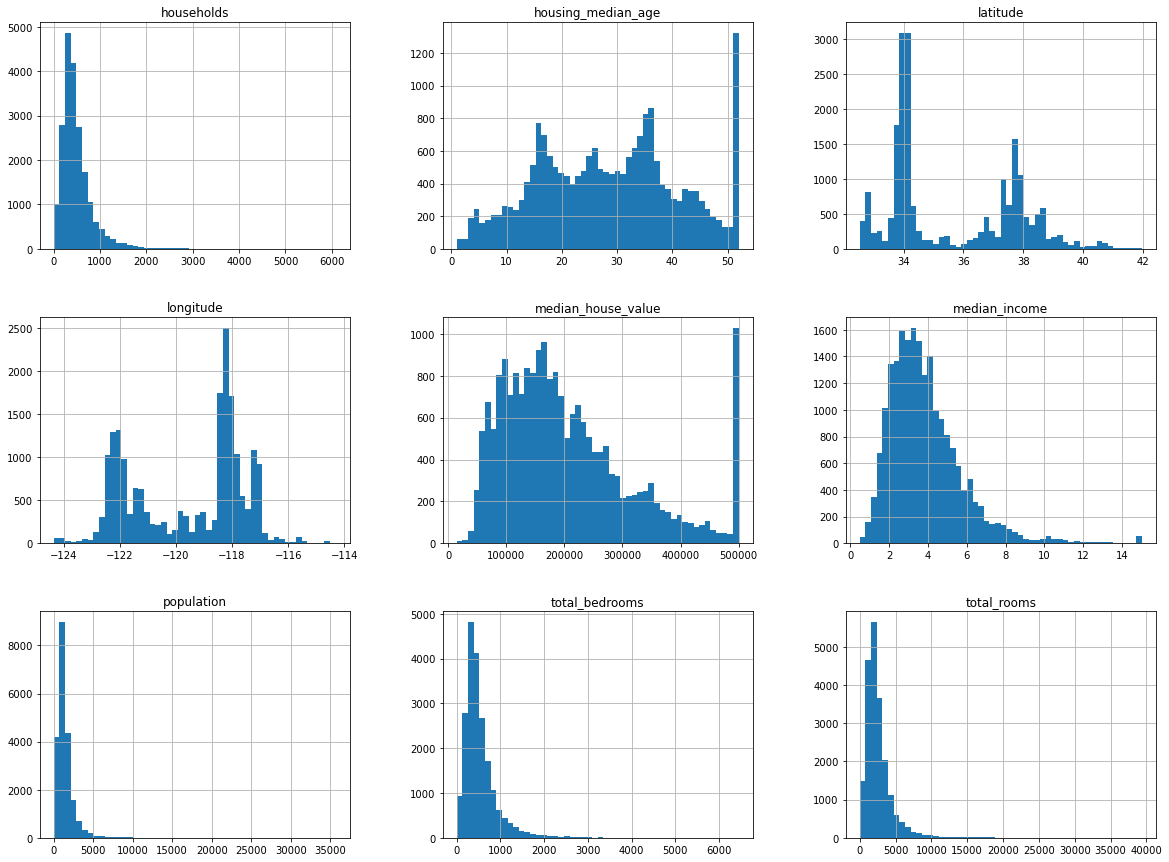

In [122]:
df.hist(bins=50, figsize=(20, 15))


### Répartition des données

1. Créez un code qui partitionne les données en base d’apprentissage et base de test. Optez pour 80% pour l’apprentissage et 20% pour le test.

In [123]:
from sklearn.model_selection import train_test_split

y = df.median_house_value
X = df.drop("median_house_value", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20/100, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 9), (4128, 9), (16512,), (4128,))


2. Affichez l’en-tête de la base de test

In [124]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,NEAR OCEAN


Nous nous intéresserons par la suite uniquement à la base d’apprentissage.
Pour cette raison, le terme données fera référence à la base d’apprentissage.

### Découverte et visualisation des données
L’information géographique (latitude et longitude) existe dans la base de données, il est intéressant de créer des graphes illustrant une visualisation géographique des données.

1. Créez un code qui affiche en abscisse la longitude et en ordonnée la latitude.
Optez pour le type scatter dans la fonction plot pour l’affichage et une valeur d’alpha (c’est un paramètre qui joue sur la transparence de la courbe) de 0.1 pour un affichage plus clair.

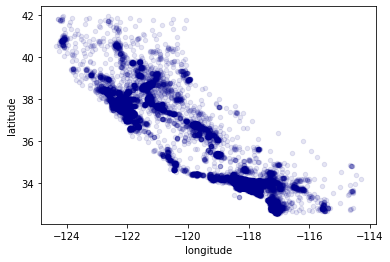

In [130]:
df.plot.scatter(x='longitude',
                y='latitude',
                alpha=0.1,
                c='DarkBlue')

2. Créez un code qui permet d’avoir une idée sur le lien entre la position géographique et le prix des maisons (target).Optez pour une valeur égale à False de "sharex".

In [131]:
df[['longitude', 'latitude', ]].corrwith(df['median_house_value'])

longitude   -0.045967
latitude    -0.144160
dtype: float64

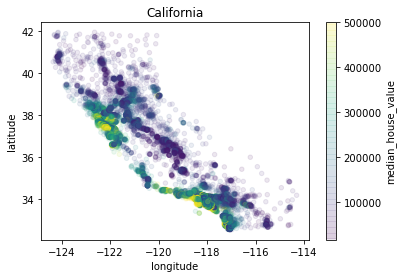

In [146]:
df.plot.scatter(x='longitude',
                y='latitude',
                c='median_house_value',
                alpha=0.1,
                sharex=False,
                title='California',
                cmap='viridis')
                #cmap='Accent')


3. Modifiez le graphe de la question précédente pour savoir la raison du prix élevé de quelques maisons.

Pour ce faire :
- Téléchargez l’image de la californie
- Utilisez la fonction imread du sous-module image du module matplotlib
- Utilisez la fonction imshow du sous-module pyplot du module matplotlib

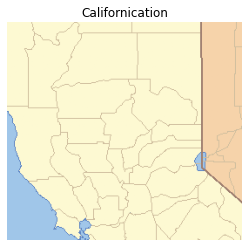

In [144]:
import matplotlib.pyplot as plt 

img_array=plt.imread("california.png")[50:300,30:300]
plt.imshow(img_array)
plt.title('Californication')
plt.axis('off')
plt.show()

In [148]:
df.plot.scatter(x='longitude',
                y='latitude',
                c='median_house_value',
                alpha=0.1,
                sharex=False,
                title='California',
                cmap='viridis')
                #cmap='Accent')

AttributeError: 'DataFrame' object has no attribute 'scatter'